# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2023/)    
## 1MS041, 2023 
&copy;2023 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# Generating random variables in different forms

In [1]:
from Utils import linConGen
import numpy as np
import matplotlib.pyplot as plt
from Utils import discrete_histogram

In [8]:
m,a,b = (2**32, 1103515245,12345)
seed = 1
np.array(linConGen(m,a,b,seed,10))/m

array([2.32830644e-10, 2.56935039e-01, 5.87870652e-01, 1.54325758e-01,
       7.67266943e-01, 9.73813963e-01, 5.85868151e-01, 8.51115584e-01,
       6.13215341e-01, 7.47386723e-01])

In [9]:
def random():
    """Generates one random sample from the uniform [0,1] distribution"""
    global seed
    seed = linConGen(m,a,b,seed,2)[1]
    return seed/m

In [12]:
unif_x = [random() for i in range(1000)]

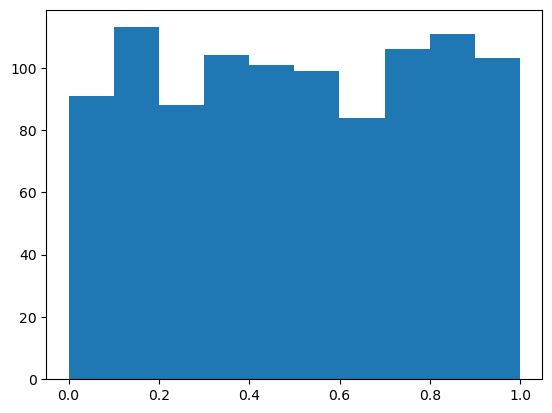

In [30]:
_=plt.hist(unif_x,bins=10)

## Generating Bernoulli rv.s

In [13]:
def unif_to_bernoulli(x,p):
    from math import floor
    return floor(x+p)

In [17]:
bernoulli_x = [unif_to_bernoulli(random(),0.9) for i in range(1000)]

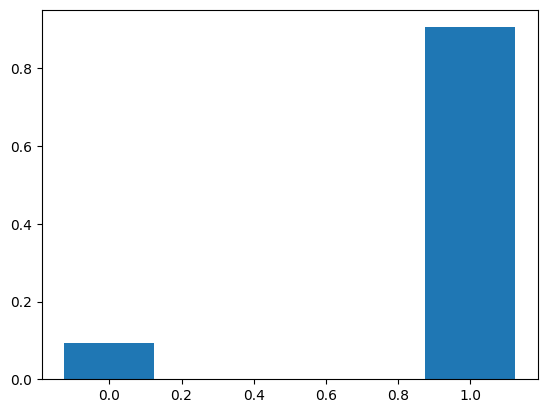

In [18]:
discrete_histogram(bernoulli_x,normed=True)

## Generating integers with different probabilites

In [19]:
p = np.array([0.1,0.2,0.5,0.2])

In [20]:
p_cumsum = np.cumsum(p)

In [32]:
uniform_x = np.array([random() for i in range(10000)])
#np.argmax(uniform_x-p_cumsum,)
uniform_x.reshape(-1,1).shape
p_cumsum.reshape(1,-1).shape

(1, 4)

In [60]:
xp = (uniform_x.reshape(-1,1)-p_cumsum.reshape(1,-1)) # (100,1), (1,4) -> (100,4)


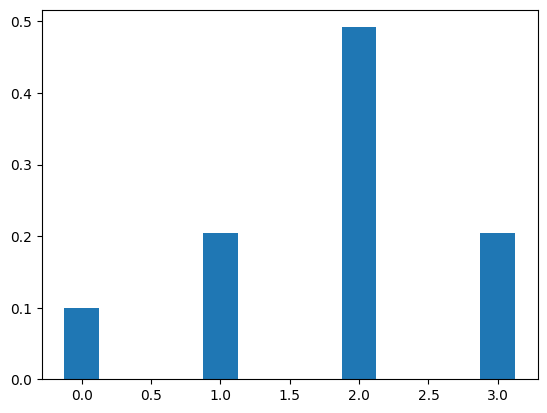

In [24]:
discrete_histogram(np.argmax(xp <= 0,axis=1),normed=True)

## Shuffling an array

```-- To shuffle an array a of n elements (indices 0..n-1):
for i from n−1 downto 1 do
     j ← random integer such that 0 ≤ j ≤ i
     exchange a[j] and a[i]```

In [92]:
def randint(b):
    """Producing random integers between 0 and b inclusive"""
    u = random()
    from math import floor
    return floor(u*(b+1))

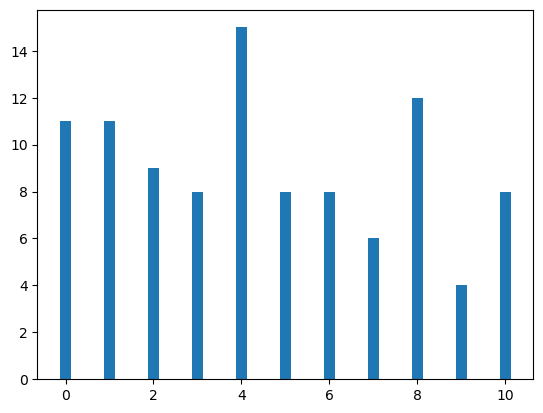

In [75]:
discrete_histogram([randint(10) for i in range(100)])

In [77]:
arr = np.arange(0,100)
n = len(arr)
for i in range(n-1,0,-1):
    j = randint(i) # Random integer between 0 and i inclusive
    tmp = arr[j]
    arr[j] = arr[i]
    arr[i] = tmp

In [78]:
arr

array([32, 40, 96, 76, 57, 21, 39, 99, 12, 93, 20, 52, 45, 75, 59, 47, 37,
       61, 86, 65, 62, 97,  3,  8, 79, 34, 49, 27, 90, 92, 10, 19, 22,  7,
       89, 46, 58, 43, 70, 11, 44, 95, 16, 33, 81,  6, 30, 66, 42, 14, 63,
       51,  9, 73, 36, 87, 55, 18, 85, 91, 60,  5, 41, 53, 94, 24, 74, 64,
       38, 72, 67, 84,  0, 56, 29, 69, 17, 77, 80, 54,  2, 13, 83, 48, 25,
       28, 82,  4, 31, 15, 98, 50, 68, 26, 35, 88, 71, 78,  1, 23])

In [103]:
def random_shuffle(arr):
    """Shuffles an array in place"""
    n = len(arr)
    for i in range(n-1,0,-1):
        j = randint(i) # Random integer between 0 and i inclusive
        tmp = arr[j]
        arr[j] = arr[i]
        arr[i] = tmp
    return arr

In [98]:
aa = np.arange(10)
random_shuffle(aa)
aa

array([0, 4, 7, 3, 9, 6, 8, 1, 5, 2])

## Permutation testing
See chapter 10 in All of Statistics

In [99]:
from math import floor
X = np.array([floor(random()+0.5) for i in range(100)])
Y = np.array([floor(random()+0.2) for i in range(100)])
XY = np.concatenate([X,Y])

In [101]:
def compute_diff(arr):
    return np.abs(np.mean(arr[:100])-np.mean(arr[100:]))

In [102]:
compute_diff(XY)

0.31

In [110]:
differences = np.array([compute_diff(random_shuffle(XY)) for i in range(10000)])

(array([4476., 1738., 1382., 1005.,  651.,  599.,   84.,   38.,   20.,
           7.]),
 array([0.01 , 0.034, 0.058, 0.082, 0.106, 0.13 , 0.154, 0.178, 0.202,
        0.226, 0.25 ]),
 <BarContainer object of 10 artists>)

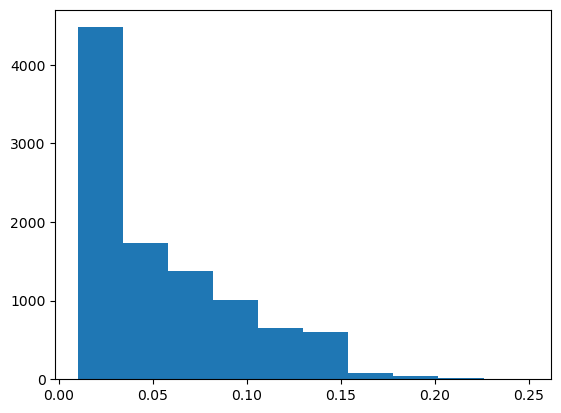

In [111]:
plt.hist(differences)